In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Check for dtypes(using info)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Check for null values**

In [6]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=['null_sum','null_ratio'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**check for unique values**

In [7]:
pd.DataFrame([df.nunique(),df.dtypes],index=['num_unique','dtypes'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
num_unique,17,136,47,51,186,248,517,52,2
dtypes,int64,int64,int64,int64,int64,float64,float64,int64,int64


# Reprsent columns (outcome) as categorical

In [8]:
df["Outcome"]=df["Outcome"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


**check for duplicated**

In [9]:
df.duplicated().sum()

0

**statistics about data**

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
df.describe(include="category")

,Outcome
count,768
unique,2
top,0
freq,500


# visualization

In [12]:
numeric_df=df.select_dtypes('number')
numeric_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
corr=numeric_df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

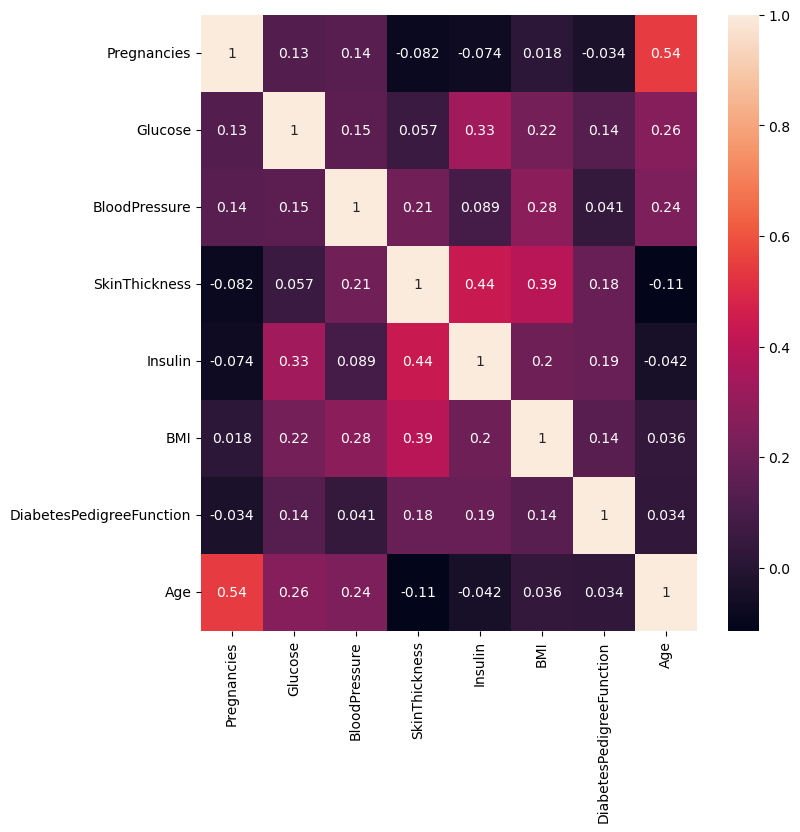

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

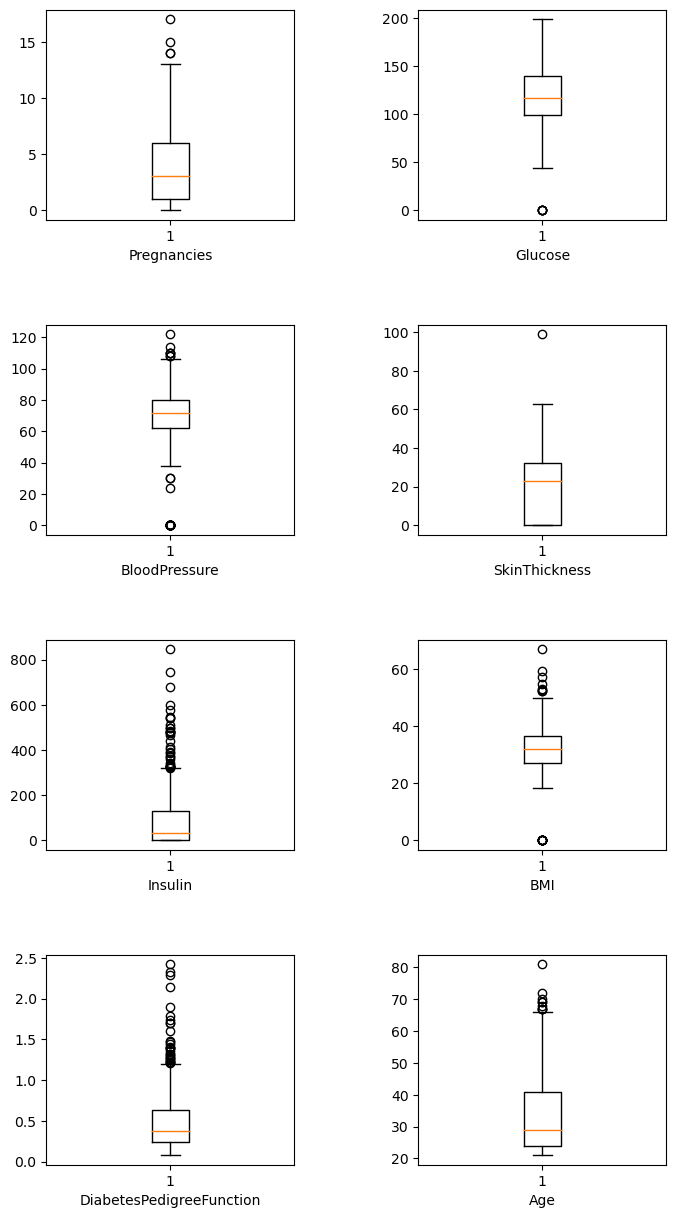

In [15]:
plt.figure(figsize=(8,15))
for i , col in enumerate (numeric_df):
    plt.subplot(4,2,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

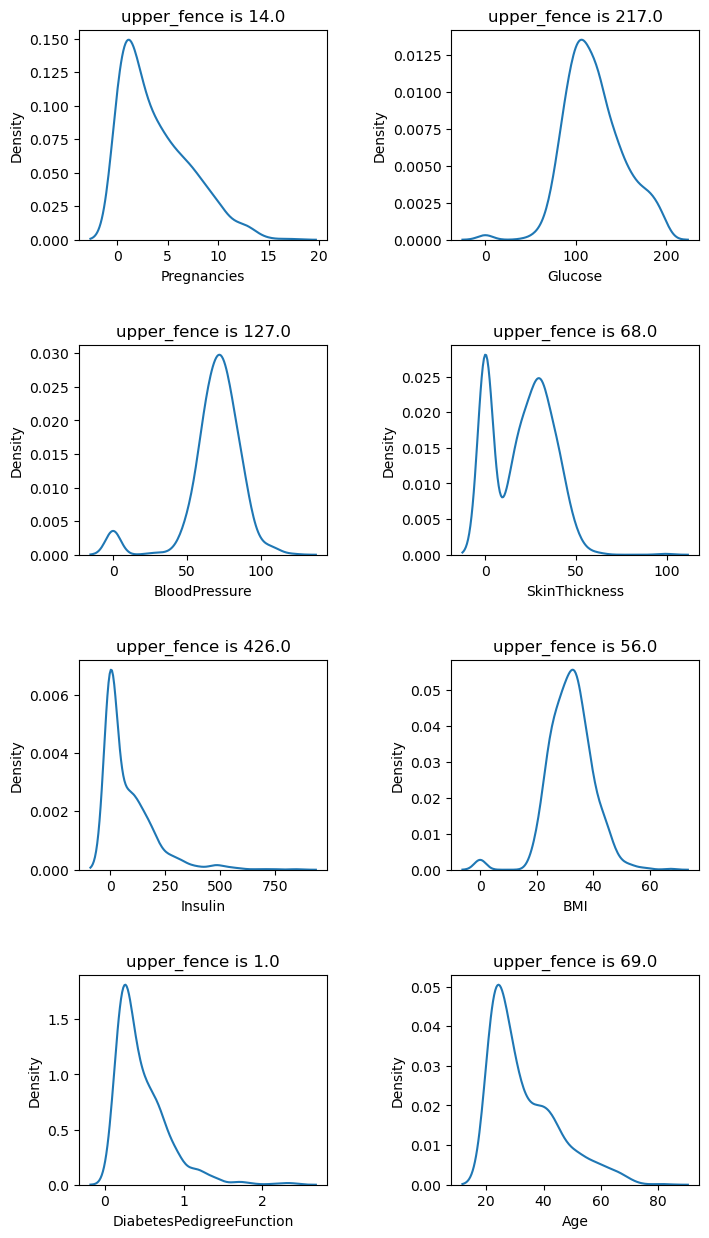

In [16]:
plt.figure(figsize=(8,15))
for i,col in enumerate(numeric_df):
    plt.subplot(4,2,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is {np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

# Check for outliears

In [17]:
for col in numeric_df.columns[:-1]:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*IQR
    ratio=1-(df[df[col]<=np.round(upper_fence)].shape[0]/df.shape[0])
    ind=df[df[col]>np.round(upper_fence)].index
    df.loc[ind,col:col]=np.round(upper_fence)
    print(f"Upper fence of {col} is: {upper_fence}")
    print(f"Ration of Outliers {ratio}")
    print(df[col].max())
    print("------------")

Upper fence of Pregnancies is: 13.5
Ration of Outliers 0.0026041666666666297
14
------------
Upper fence of Glucose is: 202.125
Ration of Outliers 0.0
199
------------
Upper fence of BloodPressure is: 107.0
Ration of Outliers 0.00911458333333337
107
------------
Upper fence of SkinThickness is: 80.0
Ration of Outliers 0.0013020833333333703
80
------------
Upper fence of Insulin is: 318.125
Ration of Outliers 0.04427083333333337
318
------------
Upper fence of BMI is: 50.550000000000004
Ration of Outliers 0.01041666666666663
51.0
------------
Upper fence of DiabetesPedigreeFunction is: 1.2
Ration of Outliers 0.06640625
1.0
------------


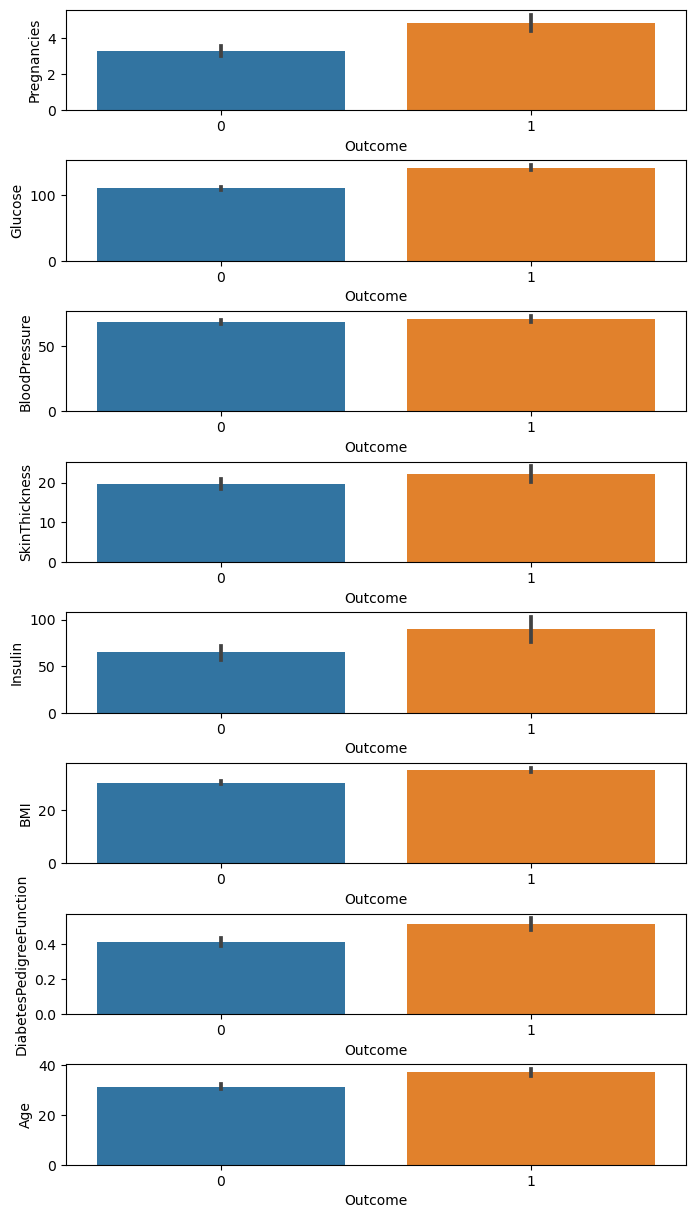

In [18]:
plt.figure(figsize=(8,15))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(8, 1, i+1)
    sns.barplot(x = df["Outcome"], y = df[col])
    plt.ylabel = col
    
plt.subplots_adjust(hspace=.5)
plt.show()    


# split data

In [136]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=29)

# Normalization

In [138]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])
y_train[["Outcome"]]=y_scaler.fit_transform(y_train[["Outcome"]])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])
y_test[["Outcome"]]=y_scaler.transform(y_test[["Outcome"]])

In [139]:
print(sum(df.Outcome==0))
print(sum(df.Outcome==1))

500
268


# ML using XGBoost

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb= GradientBoostingClassifier(random_state=0)
param_grid={
    "n_estimators":[50,100,200,300],
    "learning_rate":[.1,.01,.001,.2],
    "max_depth":[3,4,5,8]
}
grid_search=GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(x,y)
print ("best is : ",grid_search.best_params_)

best is :  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


In [141]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=100, max_depth=5)
xgb_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [142]:
from sklearn.metrics import accuracy_score

tr_pred = xgb_model.predict(x_train)
ts_pred = xgb_model.predict(x_test)

print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_test, ts_pred))


0.8794788273615635
0.7662337662337663
